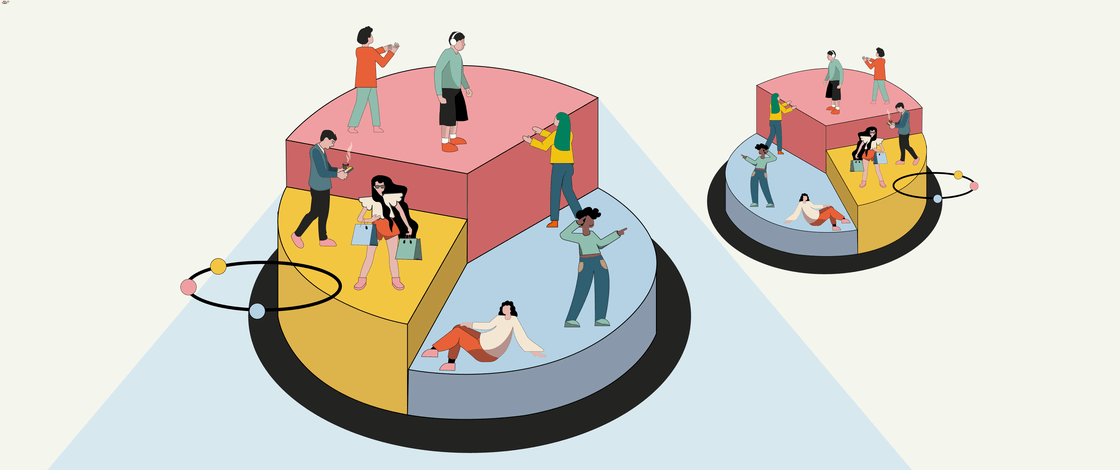

In [1]:
from IPython.display import Image
Image(filename='image.png')

# SegmentSavvy

**Revolutionizing the Shopping Experience for Bicycle Enthusiasts**

Dionne Taylor, Adam Harris, Edward Michaud, Caroline Miller

O'Neil Cohort - Data Science

June 16, 2023

**Project Goal:**  The endstate for this project includes three components:  1) Clustering Model which identifies like-minded customers based off of their purchasing power, historical item purchases, and customer age, 2) Classification Model which can identify the cluster in which a customer's transaction can be segmented, and 3) Recommender System which can link the cluster of a customer with a Amazon product which fits the customer's potential interests and budget. The project acts as proof of concept which can be summarized as using consumer sales data for particular categories of goods, in this case cycling equipment, from smaller businesses to feed marketing decisions for a global, ecommerce company like Amazon which sells a vast scope of products. 

**Project Description:** The project combines two overarching concepts and technologies:  1) customer segementation and 2) product recommendation. The first concept uses a dataset from a small cycling retailor which serves online customers from the United States, the United Kingdom, France, and Germany. The cycling shop sells primarily bikes, accessories, and clothing. Clustering is used to compile similar transactions based on purchasing power (amount spent), category of item purchased, and customer age. These clusters of transactions serve to illustrate distinct customer types. Classification machine learning is then used to cluster transactions based on demographic data as well as transactional data. The second concept uses a dataset which acts as an inventory list for cyling products which Amazon offers. Natural Language Processing techniques to further categorize the cycling product list to fit the clusters of customer types. The customer types from clustering coalesce with the sub-categories of Amazon cycling products in a recommender system which matches appropriate Amazon products to customers based on their interests, past purchases, and inferred budget. 

**Project Purpose:** Online consumers use Amazon to buy affordable, convenient products of a wide variety. Amazon makes online shopping easy and expedient. A wide variety of products can prove to be overwhelming for consumers especially if the consumer is looking for a specific product. There are multiple sports, hobbies, and jobs that require specialized expertise and personizalization when choosing products. Some of these activities include mountain climbing, cycling, backpacking, fishing, and equestrianism. People who engage in these kinds of activities are highly skilled and particular about the brands and products they use. The question this project aims to answer is can an online retailor with an immense assortment of products create a boutique style of personalized product recommendations to customers whose purchases revolve around niche and exclusive themes such as cycling? With artificial intelligence and machine learning, personalized customer segementation can be used to tailor online commerse to accomplish this goal. 

### Data Dictionary

**Dataset 1: Bicycle Sales Data**

| **Object Returned** | **Description** |
|:-------------------|:--------------------------------|
| 1. date | date of transaction (datetime) |
| 2. year | year of transaction (object) |
| 3. month | month of transaction (integer) |
| 4. customer_age |  age of the customer at the time of purchase (Float) |
| 5. customer_gender | gender of customer (female/male) |
| 6. country | country of origin of customer (object) |
| 7. state | state or province of customer (Float)  |
| 8. product_category | broad category of item purchased (object)   |
| 9. sub_category | descriptive category of item purchased(object)   |
| 10. quantity | the number of products purchased for the transaction (Float)  |
| 11. unit_cost | price which the store paid per item purhased in transaction (Float)  |
| 12. unit_price | price which the customer paid per item purchased in transaction (float)   |
| 13. cost | total prie the store paid for the quantity of item purchased in transaction(float)   |
| 14. revenue | total revenue accrued for the quantity  of items purchaseed in transaction (Float)  |

**Dataset 2: Amazon Cycling Product Data**

| **Object Returned** | **Description** |
|:-------------------|:--------------------------------|
| 1. | name	The name of the product |
| 2. | main_category	The main category of the product belong |
| 3. | sub_category	The main category of the product belong |
| 4. | image	The image of the product look like |
| 5. | link	The amazon website reference link of the product |
| 6. | ratings	The ratings given by amazon customers of the product |
| 7. | no of ratings	The number of ratings given to this product in amazon shopping |
| 8. | discount_price	The discount prices of the product |
| 9. | actual_price	The actual MRP of the product |

### Imports

In [2]:
import numpy as np
import pandas as pd
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import modeling_classification as m
import explore as e
import warnings
warnings.filterwarnings("ignore")

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

## Acquire


- The Bicycle Shop Sales Dataset was acquired from data.world


    - The wrangle.py file located in the project repository contains an aqcuire function which can be used. The function will either save a local copy of the dataset as a csv file to your local directory or it will read the file from the link into a pandas dataframe. 

    - The dataset was uploaded by the author six years ago, 2018

    - This project acquired the data in 2023

    - The dataset in its unclean form contains 34,867 rows (transactions) and 15 columns
    

- The Amazon Cycling Product Data was acquired from Kaggle.com


    - The dataset was loaded onto Kaggle.com in 2023
    
    - The dataset was scraped from Amazon.com (License: https://creativecommons.org/licenses/by-nc/4.0/)
    
    - The dataset in its unclean form contains 1,152 rows each representing one item in Amazon's cycling inventory and 9 columns

In [3]:
# calling the acquire_data() function from the wrangle.py module which loads the bicycle shop dataset

df = w.acquire_data()

Opening data from local file.


In [4]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Prepare


When called, the wrangle_data() function from the wrangle.py module actions the following steps:

    - Takes in the dataframe from acquire_data()
    - Lowercased the column names
    - replaces spaces with underscores in the column names
    - The datatype of column 'year' changed to int 
    - The datatype of column 'customer_age' changed to int
    - The datatype of column 'quantity' changed to int
    - The numeric values in columns 'unit_cost', 'unit_price', 'cost', and 'revenue' rounded to represent monetary value
    - The categorical columns 'sub_category', 'customer_gender', and 'country' one_hot_encoded
    - The categorical column 'product_category' label encoded 
    - Dataframe split into train, validate, and test dataset to prevent overfitting and prepare train for exploration
    
**Note:**  Null values were dropped from the dataframe. There was onw row with null values. This may have been input error and therefore the transaction record was removed.

In [5]:
df, train, validate, test = w.wrangle_data()

Opening data from local file.


After cleaning the data, the second aspect of data preparation is to model clusters and add them as a column in the dataframe as the target variable. 

In [6]:
# Taking the claned dataframe from wrangle_data(), the function k_means_clustering(k) is called with k
# being the specified number of clusters. The returned dataframe includes the clusters column

df = w.k_means_clustering(k=4)

Opening data from local file.
Cluster 1 Mean:
customer_age                       28.105851
sub_category_Bike Stands            0.001808
sub_category_Bottles and Cages      0.254438
sub_category_Caps                   0.076677
sub_category_Cleaners               0.024737
sub_category_Fenders                0.019888
sub_category_Gloves                 0.012410
sub_category_Helmets                0.048159
sub_category_Hydration Packs        0.004356
sub_category_Jerseys                0.024901
sub_category_Mountain Bikes         0.003698
sub_category_Road Bikes             0.001890
sub_category_Shorts                 0.005999
sub_category_Socks                  0.017751
sub_category_Tires and Tubes        0.499178
sub_category_Touring Bikes          0.000247
sub_category_Vests                  0.002794
revenue                           179.097304
dtype: float64

Cluster 2 Mean:
customer_age                       48.486637
sub_category_Bike Stands            0.003155
sub_category_Bottles a

In [7]:
# Taking the dataframe from the above function, the function clean_split_df(df) is called to split the data 
# into train, validate, and test, and removing the one_hot_encoded columns

train, validate, test = w.clean_split_df(df)

## Exploratory Data Analysis

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

### Initial Questions 


1. On average, is the reveneue of each of the customer segemnts different from one another? Are any of segmented customers spending more? Are there any distinguishable demographic information of customer segments who spend more? What types of products are they buying?


2. Does the average age of the customers among the clusters differ?


3. Are there any sub-categories of products that customers of specific genders are purchasing? What are they?


4. Between road, mountain, and touring bikes, are customers in specific geographical areas buying more of these types of bikes? Does the age differ between the customers who purchase these types of bikes? Do people of different gender purchase one type of bike more than the other?


5. Proportional to a nation's population, does one country purchase more items than the others? What are they buying if so, and how much are they spending?


6. What are the distinct characteristics of the four clusters of customers? What is the most influential driver(s) of segmenting customers?



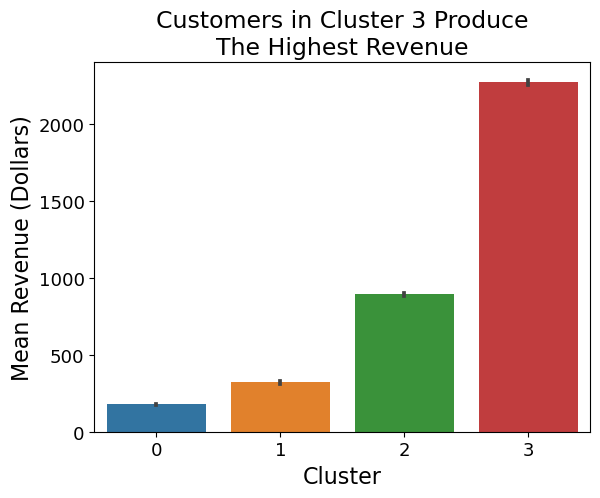

In [8]:
e.show_plot_1(train)

**Question 1:**  On average, is the reveneue of each of the customer segemnts different from one another? Are any of segmented customers spending more? Are there any distinguishable demographic information of customer segments who spend more? What types of products are they buying?

    Revenue is right-skewed continuous, cluster is categorical

    We will be using an ANOVA test to evaluate if the mean revenue value differs among the clusters

- H$_0$ - There is no difference in mean revenue amongst each customer cluster
- H$_a$ - The mean revenue value is different for each customer cluster

In [9]:
e.get_test_1(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 33539.63583859


The ANOVA test suggests that there is a difference in the mean value of revenue among each cluster.

**What is each segment paying on average?**

In [10]:
e.get_avg_cluster_revenue(train)

cluster 0 average revenue is: 179.45
cluster 1 average revenue is: 321.25
cluster 2 average revenue is: 894.45
cluster 3 average revenue is: 2274.29


**Which segment pays the most / least?**

Cluster 3 pays the most, with an avg revenue of \$ 2276.82

Cluster 0 pays the least, with an avg revenue of \$ 179.51

**Question 2:**  Does the average age of the customers among the clusters differ?

- H$_0$ - The mean value of age is the same amongst each customer cluster
- H$_a$ - The mean value of age is different amongst different customer clusters

    Age is right-skewed continuous, cluster is categorical

    We will be using an ANOVA test to evaluate if the mean age value differs among the clusters

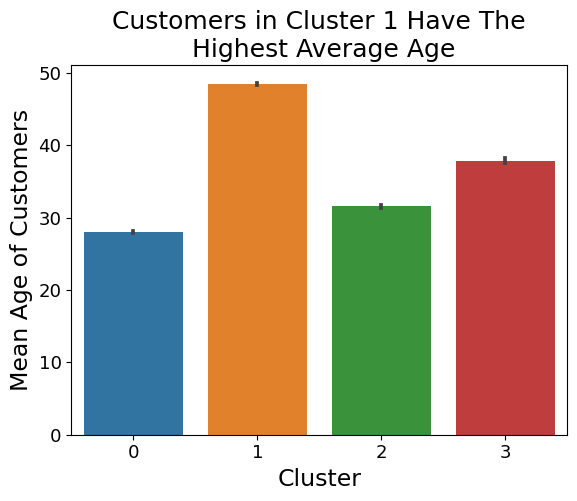

In [11]:
e.show_plot_2(train)

In [12]:
e.get_test_2(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00000000
test stat value: 9925.11354908


Looks like the revenue variances are equal among the clusters, lets proceed with ANOVA test

The ANOVA test suggests that there is a difference in the mean value of customer_age among the different clusters

**If there is a difference of mean age, in which cluster are the age groups located?**

In [14]:
e.get_avg_cluster_age(train)

cluster 0 average customer_age is: 28.1
cluster 1 average customer_age is: 48.5
cluster 2 average customer_age is: 31.6
cluster 3 average customer_age is: 37.9


Cluster 0 is the youngest, with a mean age of 28.1. 

Cluster 1 is the oldest, with a mean age of 48.5 

**Question 3:**  Is there a relationship between age and/or gender and sub category purchased?

Looking at age and sub category first.

- H$_0$ - There is no relationship between age and the sub catgory of items purchased.
- H$_a$ - There is a linear relationship between age and the sub category of items purchased.

    Age is right-skewed continuous, and sub_category is categorical
    
    We will be using an ANOVA test

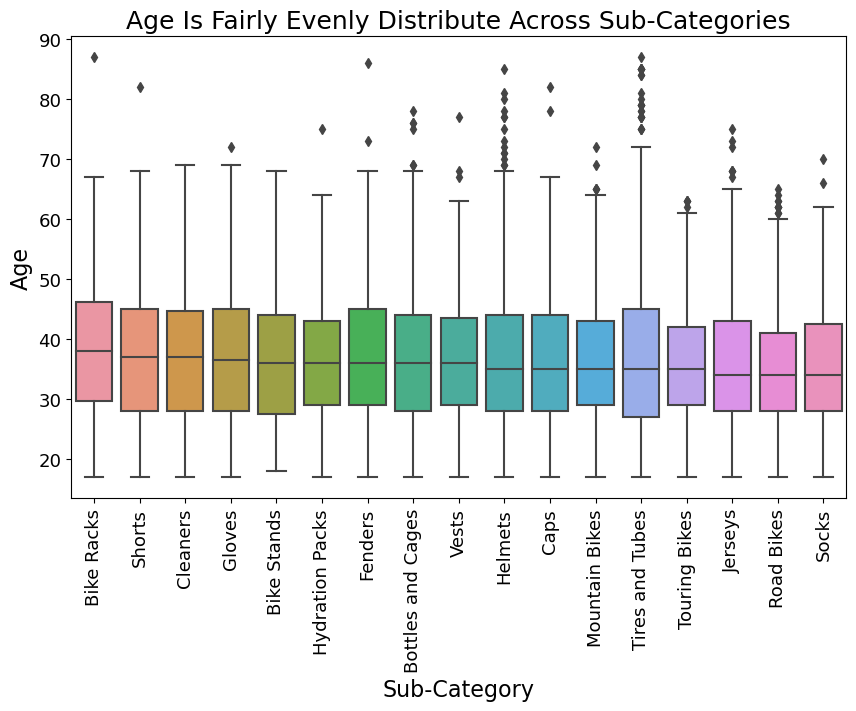

In [15]:
e.show_plot_3(train)

In [16]:
e.get_test_3(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.01044170
test stat value: 31.85551356


The statistcal test suggests that there is correlation between age and sub-category purchased.

**Question 4:** Is there a relationship between gender and sub category purchased?

- H$_0$ - There is no relationship between gender and the sub catgory of items purchased.
- H$_a$ - There is a linear relationship between gender and the sub category of items purchased.

    Age is right-skewed continuous, and sub_category is categorical
    
    We will be using an ANOVA test

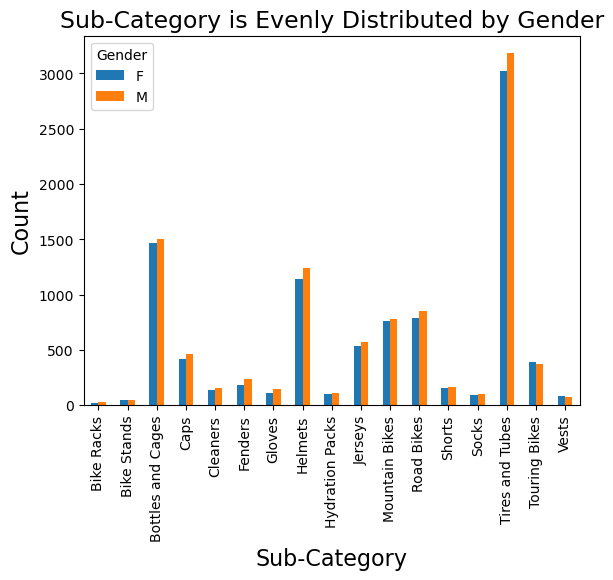

In [17]:
e.show_plot_4(train)

In [18]:
e.get_test_4(train)

========== ACCEPT THE NULL HYPOTHESIS! ==========
P-Value: 0.58319328


Based on our chi-squared statistical test, we are unable to reject our null hypothsis. Therefore we do not have enough evidence to say that the sub_category purchased is dependent upon the customer's gender.

**Question 5:**  Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by age?

 - H$_O$ - The type of bike purchased is independent of age
    
- H$_a$ -  The type of bike purchased is dependent on age of customer

Age is right-skewed continuous, and type of bike purchased is categorical

We will be using an ANOVA test

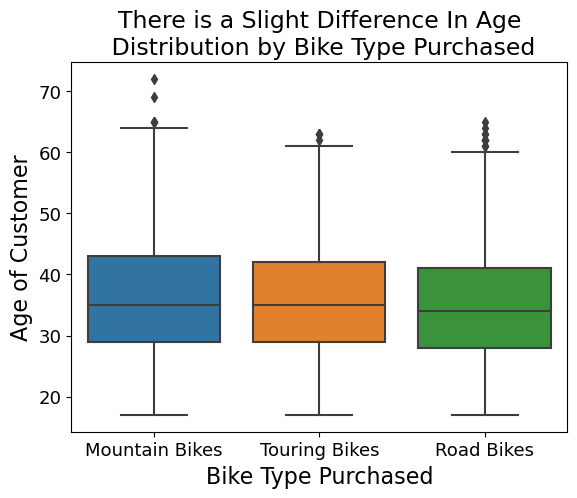

In [19]:
e.show_plot_5(train)

In [21]:
e.get_test_5(train)

========== REJECT THE NULL HYPOTHESIS! ==========
P-Value: 0.00007305
test stat value: 9.54729572


The ANOVA test suggests that the mean age of customers is different for the three different types of bike, though there is not a large amount of variance between them. 

**Question 6:** Is there a difference between purchases of the 3 types of bikes (mountain, road, touring) by gender?

In [ ]:
# ** COMING SOON **

**Question 6:** What are the distinct characteristics of the four clusters of customers? What is the most influential driver(s) of segmenting customers?

In [ ]:
# ** COMING SOON **

## Exploration Summary

In analyzing age and budget across the four segments of customers, it seems that KMeans has identified distinct groups:

    Group 0:  Low budget and the youngest group (twenties)
    Group 1:  Mid-Low budget and the oldest group (forties)
    Group 2:  Mid-High budget and early thirties (early thirties)
    Group 3:  High budget and late thirties (late thirties)

## Modeling

### Introduction


- The modeling process combined two Classification machine learning models. Numerous Decision Tree Classifier and Random Forest CLassifier models were created.


- The columns used in training and evaluating the models included all of the demographic information, the sub-category of product(s) purchased, the overall category of product(s) purchased, the transactional data to include cost, price, and quantity. The continous variables were scaled were using the Standard Scaler, and the discrete variables were one hot-encoded. The target variable is the clusters column representing the customer segmentation.


- The purpose of the classification model is to test the performance of the clusters which KMeans created using the transactional data. **The model is significant** if its performance is excellent because 1) we can confirm the distinction of the clusters of customer segments and 2) the classification model can then be used to place new customers in the most appropriate customer segment based on the transactional data. 


- The baseline used is the most common value of cluster among the four customer segemnts. 


- The evaluation metric used to gauge the best model is the **recall score**. This metric illustrates how well a model can minimize false negatives. This is important to this project because the proper segmentation of a customer is paramount to identifying the customer's purchasing power, their interests, their age which are all indicative of providing accurate product recommendations. Tailored product recommendations give the customer a personalized experience, showing that the retailor is attentive to the customer's needs. The customer may then be more inclined to purchase their goods from the online retailer. A tailored and personalized online interface gives the consumer a boutique experience.

In [ ]:
# Reloading k clusters and resplitting scaled/encoded train, validate, test

train, validate, test = w.split_data(w.k_means_clustering(k=4))

In [ ]:
# the find_baseline_and_eval_df function is called from the modeling_classification module

# This function assigns the most common value of the clusters into a new column representing the 
# baseline prediction for each transaction.

# The function then calculates the accuracy, precision, recall, and F1 scores comparing the 
# predictions to the actual clusters

# These values are captured in a dictionary which is then made into the returned dataframe

m.find_baseline_and_eval_df()

**Evaluating the Baseline:**  Using recall as the evalaution metric, we can see that if we assigned all customers to the most common cluster of customer segment, the probabilty of making a positive prediction while minimizing false negatives would be around 25% of the time. In the following section, we will create Classification models in an attempt to prove that the transactional data can be used to distinguish between the clusters KMeans identified and that the model performs better than the baseline.

### Creating and Evaluating Machine Learning Classification Models

**Note:**  K Nearest Neighbor models will not be used as the algorithm involved finds clusters in feature space, which is similar to the clustering used in feature engineering the target variables. Logistic Regression modeling will not be used as the algorithm as the target in multi-class.

In [ ]:
# 
m.find_dt_best_model_by_recall_difference(max_depth_range=10)

In [ ]:
m.find_rf_best_model_by_recall_difference()

In [ ]:
m.test_decision_tree(max_depth=10)

## You may use this as a template for how to introduce your models:

### Model Type

In [ ]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [ ]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.